In [2]:
import bagpy
from bagpy import bagreader
import math

In [7]:
# file_name = "2024-10-18-11-31-06.bag"
# file_name = "2024-10-18-12-27-02.bag"
# file_name = "2024-10-18-12-33-16.bag"

# b = bagreader('/home/soslab/Desktop/Allen_harbor_10_18_2024/'+file_name)

file_name = "search_mode_3.bag"
# b = bagreader('/home/soslab/auv_ws/bags/thesis/'+file_name)

b = bagreader('/home/soslab/auv_ws/'+file_name)
# b = bagreader('/home/soslab/auv_ws/'+file_name+'.bag')

# b = bagreader('/home/soslab/test.bag')

[INFO]  Successfully created the data folder /home/soslab/auv_ws/search_mode_3.


In [8]:
b.odometry_data()

['/home/soslab/auv_ws/search_mode_3/alpha_rise-odometry-filtered-local.csv']

In [10]:
odom = b.odometry_data()[0]
stand_off = b.std_data()[0]
state = b.std_data()[-1]

In [11]:
import pandas as pd
stand_off = pd.read_csv(stand_off)
odom = pd.read_csv(odom)
state = pd.read_csv(state)

In [14]:
import numpy as np

distance = stand_off['data'].tolist()

In [15]:
current_state = state['data'].tolist()

In [31]:
value = 0
# column_values = distance[:len(current_state)]
column_values = distance[:]

for i in column_values:
        value += ((20 - i) ** 2)

rmse = np.sqrt(value/len(column_values))

In [32]:
rmse

7.952813295727708

In [33]:
len(current_state)

2029

In [34]:
rmse_wo_mode = 0
count_wo_mode = 0
current_state = state['data'].tolist()
for index, value in enumerate(current_state):
    if value == 0:
        rmse_wo_mode += ((20-column_values[index]) ** 2)
        count_wo_mode += 1
rmse_wo_mode = np.sqrt(rmse_wo_mode/count_wo_mode)
print(rmse_wo_mode)

4.80256920103582


In [37]:
current_state = state['data'].to_list() 
current_state_time = state['Time'].to_list()
current_state = current_state[::] 

for i in range(len(current_state)):
    if current_state[i] == -1:
        current_state[i] = -1
    elif current_state[i] == 1:
        current_state[i] = 30
    elif current_state[i] == 2:
        current_state[i] = 50

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(0, -10.0, '−10'),
  Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60')])

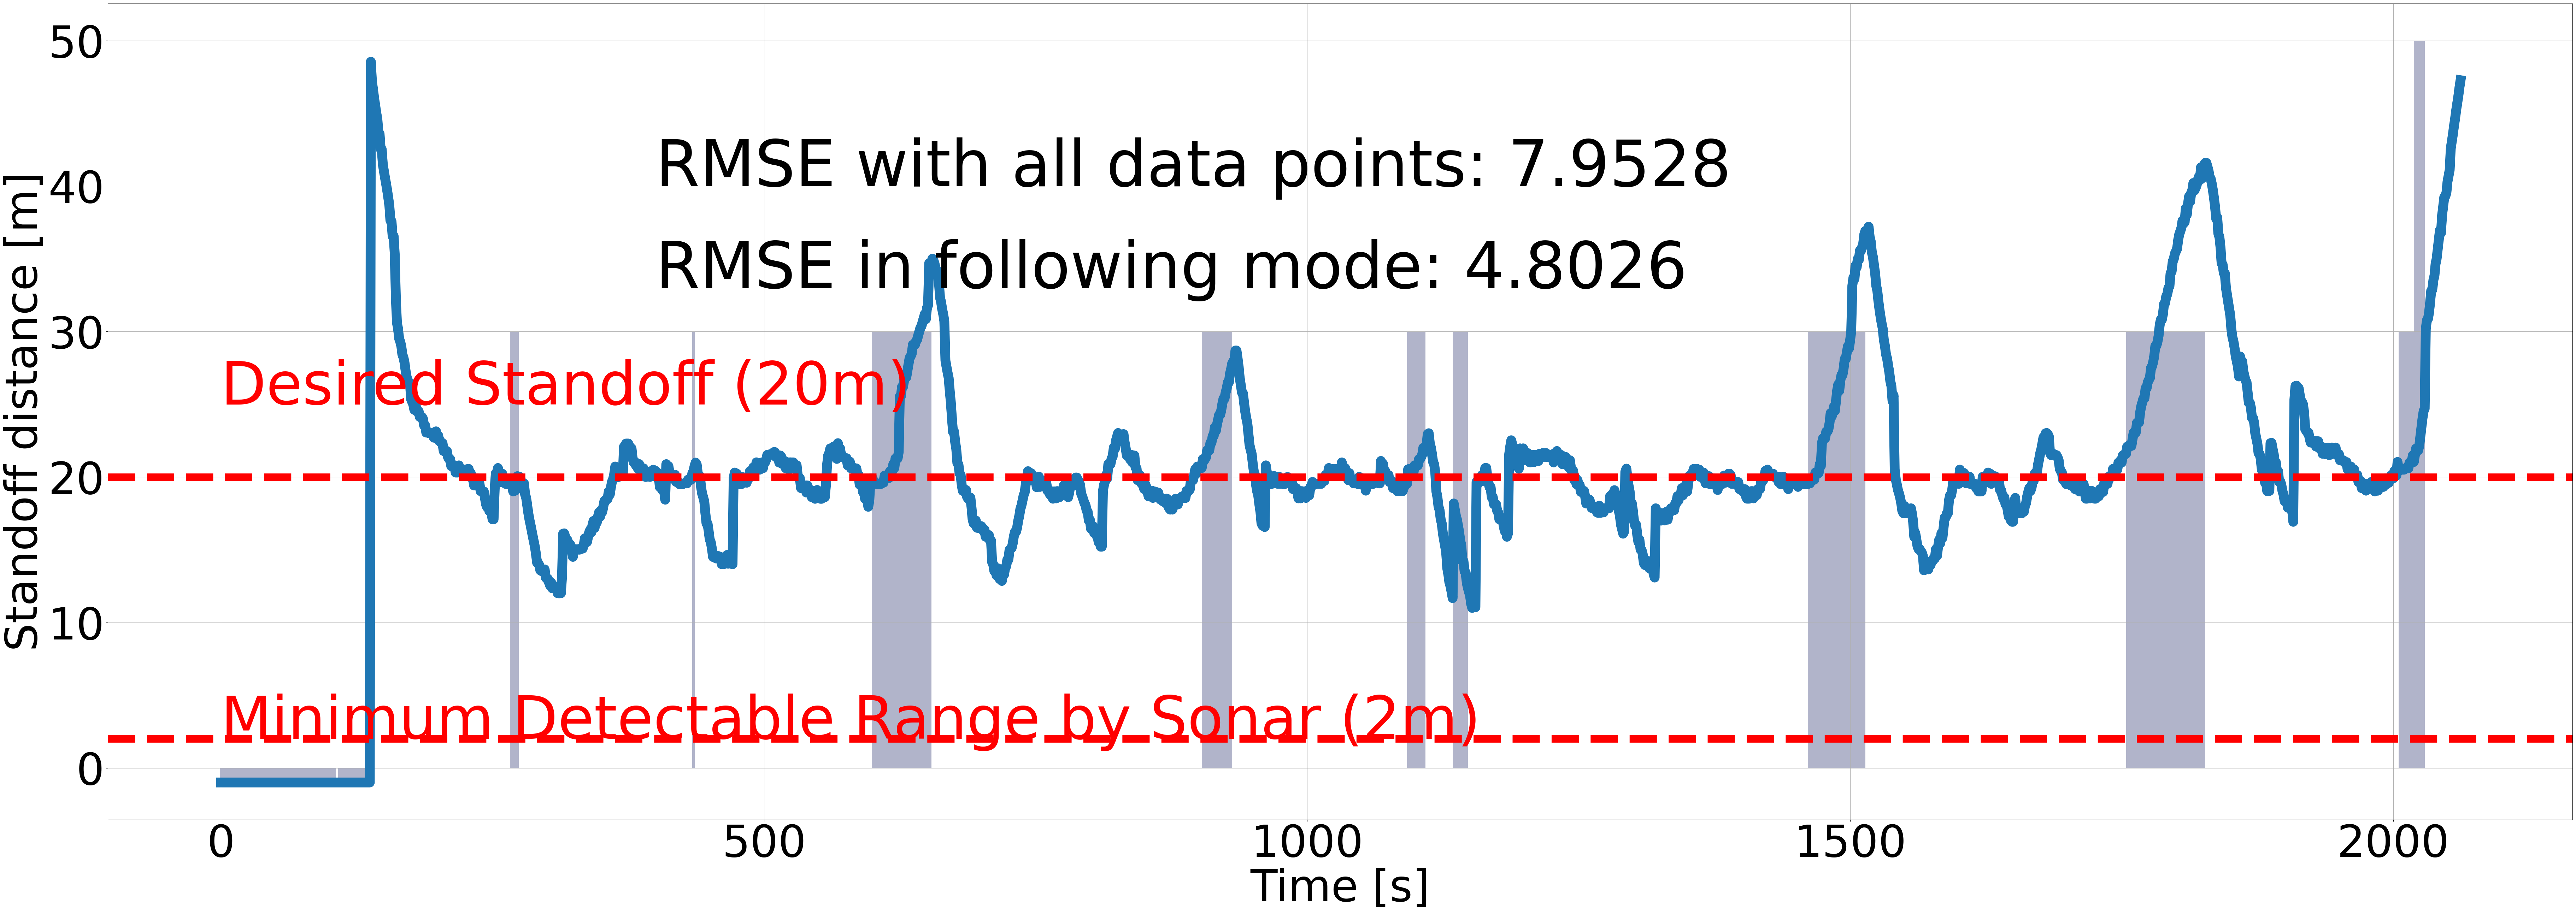

In [39]:
from matplotlib import pyplot as plt
plt.figure(figsize=(90, 30))
plt.plot(column_values[:], linewidth=20)
# plt.plot(current_state[:], linestyle="-", linewidth=10)
plt.bar(range(0,len(current_state)), current_state[:], width=2, color='#B1B4CA')

plt.annotate(xy=(400,40), text=f"RMSE with all data points: {round(rmse,4)}", fontsize=130)
plt.annotate(xy=(400,33), text=f"RMSE in following mode: {round(rmse_wo_mode,4)}", fontsize=130)

# plt.annotate(xy=(0,4), text=f"RMSE with all data points: {round(rmse,4)}", fontsize=130)
# plt.annotate(xy=(0,5), text=f"RMSE in following mode: {round(rmse_wo_mode,4)}", fontsize=130)


plt.axhline(y=20, color='r', linestyle='--', linewidth=15)
plt.annotate(xy=(-0,25), text=f"Desired Standoff (20m)", color='r',fontsize=120)
plt.axhline(y=2, color='r', linestyle='--', linewidth=15)
plt.annotate(xy=(-00,2), text=f"Minimum Detectable Range by Sonar (2m)", color='r',fontsize=120)

plt.xlabel('''Time [s]''', fontsize = 90)
# plt.ylim([-2,50])
plt.ylabel('Standoff distance [m]', fontsize = 90)
plt.grid(True)
plt.xticks(fontsize=90)
plt.yticks(fontsize=90)

In [23]:
x = odom["pose.x"].tolist()
y = odom['pose.y'].tolist()

y_trans = []
for i in y:
    i = -i
    y_trans.append(i)

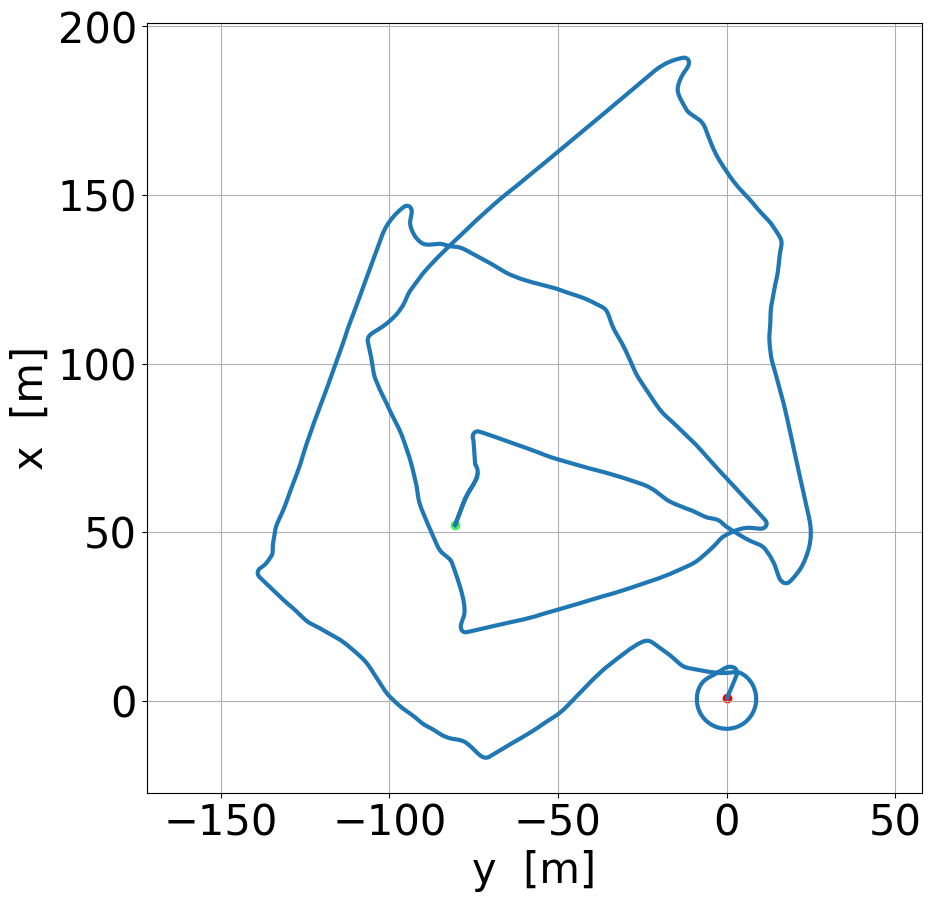

In [24]:
plt.figure(figsize=(10, 10))
plt.xlabel('''y  [m]''', fontsize = 30)
plt.ylabel("x  [m]", fontsize = 30)

plt.scatter(x[0],y[0],color="red",label='Vehicle Initial Pose')
plt.scatter(x[-1],y[-1],color="#4eea60",label='Vehicle Final Pose')

# plt.scatter(45,30,color="#d04eea",marker='^', label='Iceberg Initial Pose (30,45)')
# plt.scatter(56.4, 83, color="#1a46b6",marker='^',label='Iceberg Final Pose (83,56.4)')
# plt.scatter(50.6, 68, color="#1a46b6",marker='^',label='Iceberg Final Pose (74,52.48)')
# plt.scatter(52.8, 74, color="m",marker='^',label='Iceberg Final Pose (74,52.8)')
# plt.legend(loc=(1,0.5), fontsize=15)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# plt.xlim([-100,180])
# plt.ylim([-60,200])
plt.grid(True)
plt.axis('equal')
plt.plot(x[:],y[:], linewidth=3)